**Найти минимум функции одной переменной двумя методами: одним из методов нулевого порядка и одним из методов первого и второго порядка, проверив применимость метода к заданной функции. Для решения составить компьютерную программу на любом языке программирования.**

Вариант 3

$$f(x)=x2+3x(lnx−1),x∈[0.5,1]$$

**Проверка непрерывности функции**

- $x^2$ — непрерывна всюду.  
- $\ln x$ — непрерывна при $x > 0$, значит $3x(\ln x-1)$ непрерывна при $x>0$.  
- Сумма непрерывных функций непрерывна на пересечении их областей определения.  

**Вывод:** функция $f(x)$ непрерывна на интервале $[0.5,1]$, так как весь интервал лежит в области $x>0$.


Функция: x**2 + 3*x*(log(x) - 1)
Первая производная: 2*x + 3*log(x)
Вторая производная: 2 + 3/x


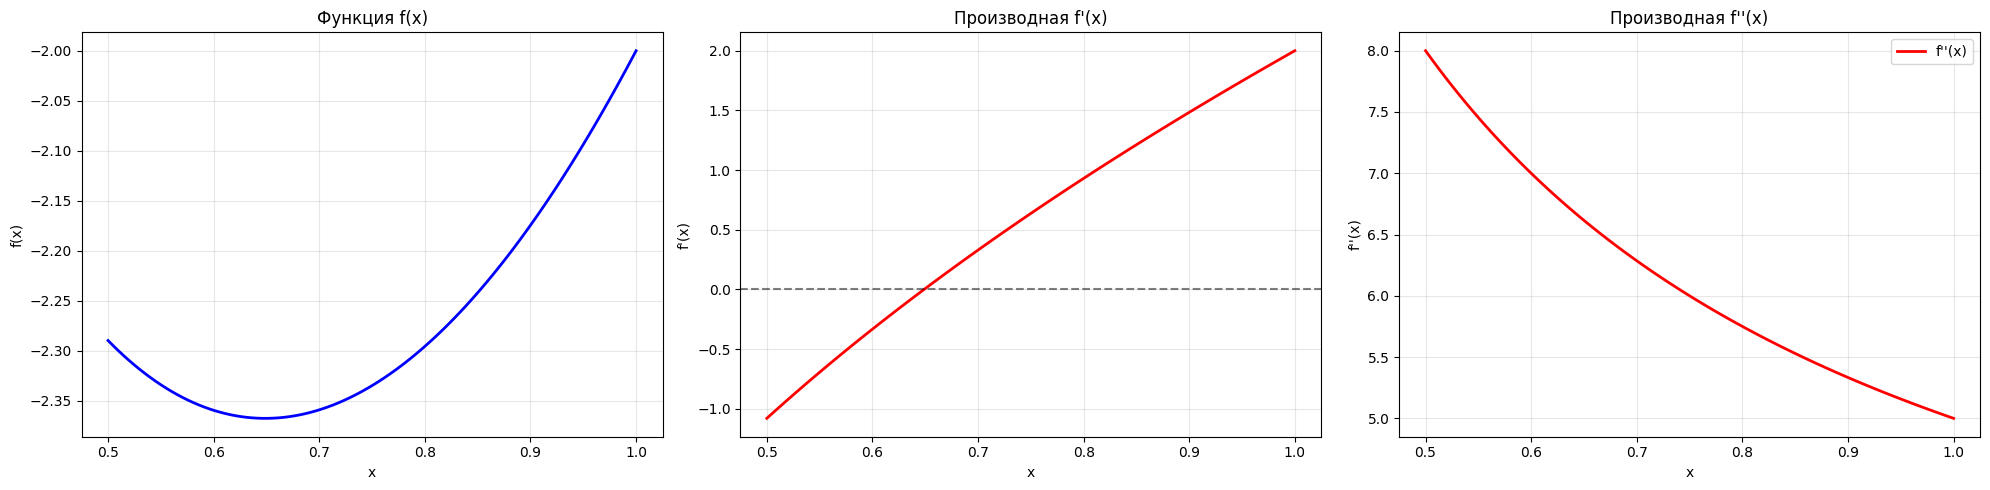

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x_sym = sp.Symbol("x")
f_sym = x_sym**2 + 3 * x_sym * (sp.log(x_sym) - 1)
f_der_sym = sp.diff(f_sym, x_sym)
f_double_der_sym = sp.diff(f_der_sym, x_sym)

print("Функция:", f_sym)
print("Первая производная:", f_der_sym)
print("Вторая производная:", f_double_der_sym)

# Conditions
A = 0.5
B = 1
EPS = 1e-6

# Python-notation func and its derivatives
F = sp.lambdify(x_sym, f_sym, "numpy")
F_PRIME = sp.lambdify(x_sym, f_der_sym, "numpy")
F_DOUBLE_PRIME = sp.lambdify(x_sym, f_double_der_sym, "numpy")

x = np.linspace(0.5, 1, 100)
y = F(x)
y_prime = F_PRIME(x)
y_double_prime = F_DOUBLE_PRIME(x)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(x, y, "b-", linewidth=2)
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Функция f(x)")

plt.subplot(1, 3, 2)
plt.plot(x, y_prime, "r-", linewidth=2, label="f'(x)")
plt.axhline(y=0, color="k", linestyle="--", alpha=0.5) 
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Производная f'(x)")


plt.subplot(1, 3, 3)
plt.plot(x, y_double_prime, "r-", linewidth=2, label="f''(x)")
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.title("Производная f''(x)")

plt.legend()
plt.tight_layout()
plt.show()

**Функция унимодальна, выражен минимум. Можно взять метод золотого сечения - наиболее быстрый, при заданном отрезке и гарантированной унимодальности.**

Minimum at x = 0.6488442641762147
f(xmin) = -2.3675311092091733
Number of steps: 28

First 10 steps:
   Step         a         b        x1        x2     f(x1)     f(x2)
0     1  0.500000  1.000000  0.690983  0.809017 -2.361736 -2.286920
1     2  0.500000  0.809017  0.618034  0.690983 -2.364352 -2.361736
2     3  0.500000  0.690983  0.572949  0.618034 -2.347903 -2.364352
3     4  0.572949  0.690983  0.618034  0.645898 -2.364352 -2.367502
4     5  0.618034  0.690983  0.645898  0.663119 -2.367502 -2.366860
5     6  0.618034  0.663119  0.635255  0.645898 -2.366917 -2.367502
6     7  0.635255  0.663119  0.645898  0.652476 -2.367502 -2.367487
7     8  0.635255  0.652476  0.641833  0.645898 -2.367368 -2.367502
8     9  0.641833  0.652476  0.645898  0.648411 -2.367502 -2.367530
9    10  0.645898  0.652476  0.648411  0.649963 -2.367530 -2.367527


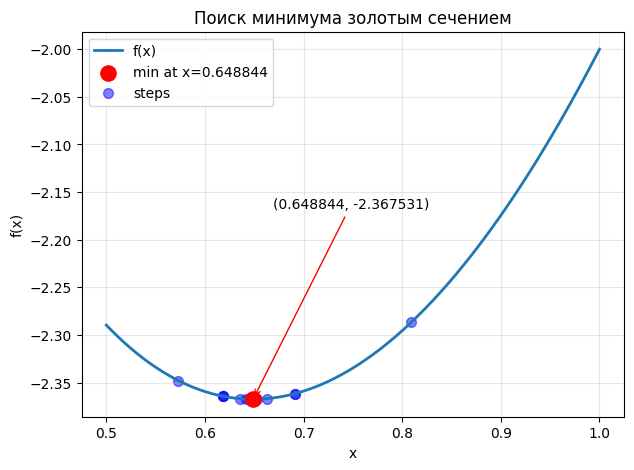

In [2]:
import pandas as pd

PHI = (np.sqrt(5) + 1) / 2
GOLDEN_RATIO = 1 / PHI

def golden_section_table(func=F, a=A, b=B, eps=EPS, max_iter=10000):
    iterations = 0
    steps_x = []
    steps_y = []
    table = []

    x1 = b - GOLDEN_RATIO * (b - a)
    x2 = a + GOLDEN_RATIO * (b - a)

    y1 = func(x1)
    y2 = func(x2)

    while (b - a) > eps and iterations < max_iter:
        iterations += 1
        steps_x.extend([x1, x2])
        steps_y.extend([y1, y2])
        table.append([iterations, a, b, x1, x2, y1, y2])

        if y1 < y2:
            b = x2
            x2 = x1
            y2 = y1
            x1 = b - GOLDEN_RATIO * (b - a)
            y1 = func(x1)
        else:
            a = x1
            x1 = x2
            y1 = y2
            x2 = a + GOLDEN_RATIO * (b - a)
            y2 = func(x2)

    df = pd.DataFrame(table, columns=["Step", "a", "b", "x1", "x2", "f(x1)", "f(x2)"])
    return (a + b) / 2, steps_x, steps_y, df, iterations

# Calculate and plot
xmin, steps_x, steps_y, df_steps, num_steps = golden_section_table()
print("Minimum at x =", xmin)
print("f(xmin) =", F(xmin))
print("Number of steps:", num_steps)

print("\nFirst 10 steps:")
print(df_steps.head(10))

xx = np.linspace(0.5, 1.0, 400)
yy = F(xx)

plt.figure(figsize=(7, 5))
plt.plot(xx, yy, linewidth=2, label="f(x)")
plt.scatter(
    [xmin], [F(xmin)], s=120, color="red", zorder=5, label=f"min at x={xmin:.6f}"
)
plt.annotate(
    f"({xmin:.6f}, {F(xmin):.6f})",
    xy=(xmin, F(xmin)),
    xytext=(xmin + 0.02, F(xmin) + 0.2),
    arrowprops=dict(arrowstyle="->", color="red"),
)
plt.scatter(steps_x, steps_y, s=50, color="blue", alpha=0.5, label="steps")
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Поиск минимума золотым сечением")
plt.legend()
plt.show()

**Метод касательной**

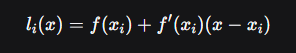

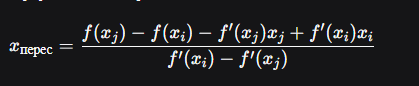

x=0.730652, f=-2.345979, gap = 0.192717
x=0.610150, f=-2.362502, gap = 0.046120
x=0.669150, f=-2.366175, gap = 0.011775
x=0.639332, f=-2.367230, gap = 0.002912
x=0.654162, f=-2.367438, gap = 0.000732
x=0.646727, f=-2.367516, gap = 0.000183
x=0.650440, f=-2.367523, gap = 0.000046
x=0.648582, f=-2.367531, gap = 0.000011
x=0.649511, f=-2.367530, gap = 0.000003
Tolerance of 1e-06 reached

x_min = 0.6490463984, f_min = -2.367531
Tangents total: 11


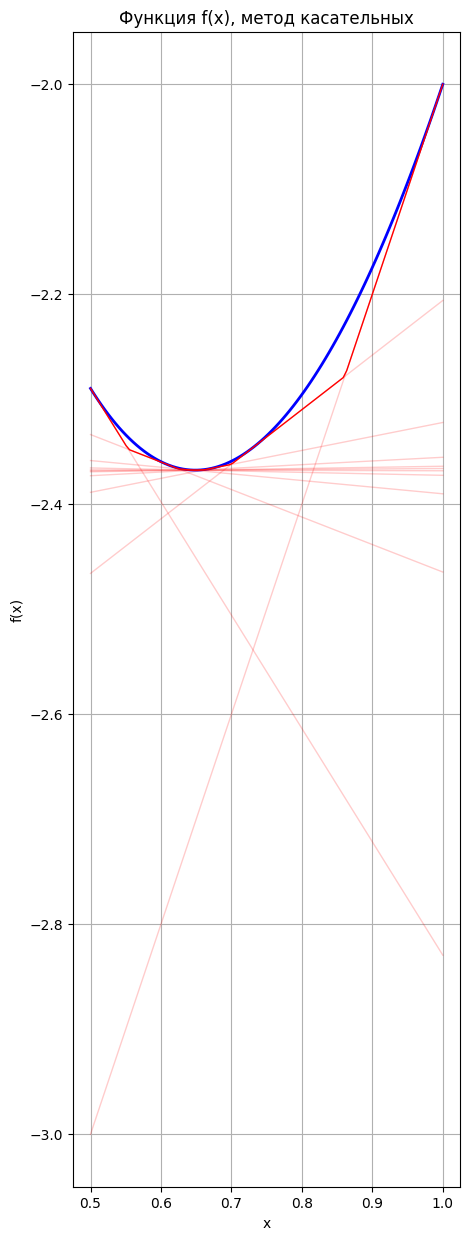

In [41]:
import numpy as np

a = 0.5
b = 1
EPS = 1e-6

def get_tangent_value(tangent_x, x_for_calc):
    return F_PRIME(tangent_x) * (x_for_calc - tangent_x) + F(tangent_x)


def find_tangent_interception_x(x_1, x_2):
    x_inter = (F(x_2) - F(x_1) - F_PRIME(x_2) * x_2 + F_PRIME(x_1) * x_1) / (F_PRIME(
        x_1
    ) - F_PRIME(x_2))

    return x_inter


tangent_x_points = [a, b]
while True:

    # Find next envelope minimum
    minimal_envelope_breakpoint_y = np.inf
    next_tangent_x = None
    for x_i in tangent_x_points:
        for x_j in tangent_x_points:
            # Skip same tangent-x
            if x_i == x_j:
                continue

            # Get interception point
            x_intercept = find_tangent_interception_x(x_i, x_j)

            # Check if x belongs in [a;b]
            if not (a <= x_intercept <= b):
                continue

            # Find envelope is on envelope and is its minimum
            envelope_y_at_intercept = -np.inf
            for x_k in tangent_x_points:
                env_y = get_tangent_value(x_k, x_intercept)
                if env_y > envelope_y_at_intercept:
                    envelope_y_at_intercept = env_y

            if envelope_y_at_intercept < minimal_envelope_breakpoint_y:
                minimal_envelope_breakpoint_y = envelope_y_at_intercept
                next_tangent_x = x_intercept

    if next_tangent_x is None:
        print("New point wasn't found")
        break

    # Check stop conditions
    f_at_new_x = F(next_tangent_x)
    gap = f_at_new_x - minimal_envelope_breakpoint_y
    if gap < EPS:
        print(f"Tolerance of {EPS} reached")
        break
    
    # Info output
    print(f"x={next_tangent_x:.6f}, f={f_at_new_x:.6f}, gap = {gap:.6f}")

    # Append x to tangents
    if next_tangent_x not in tangent_x_points:
        tangent_x_points.append(next_tangent_x)
    else:
        print(f"x {next_tangent_x} already used")
        break

print(f"\nx_min = {next_tangent_x:.10f}, f_min = {F(next_tangent_x):.6f}")
print(f"Tangents total: {len(tangent_x_points)}")

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 15))

x_vals = np.linspace(A, B, 100)
f_values = F(x_vals)
plt.plot(x_vals, f_values, "b-", linewidth=2)

tangent_curves = []
for tang_x in tangent_x_points:
    tangent_curve = [get_tangent_value(tang_x, x) for x in x_vals]
    tangent_curves.append(tangent_curve)
for i, tangent_curve in enumerate(tangent_curves):
    plt.plot(x_vals, tangent_curve, "r", alpha=0.2, linewidth=1)

envelope_vals = np.max(tangent_curves, axis=0)
plt.plot(x_vals, envelope_vals, "r", linewidth=1)

plt.grid(True, alpha=1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Функция f(x), метод касательных")

plt.show()

**Метод Ньютона**

Minimum at x = 0.6488441332977222
f(xmin) = -2.36753110920923
Number of steps: 5

First 10 steps:
   Step         x      f(x)         f'(x)    f''(x)
0     1  0.800000 -2.295545  9.305693e-01  5.750000
1     2  0.750000 -2.334785  6.369538e-01  6.000000
2     3  0.700000 -2.359017  3.299752e-01  6.285714
3     4  0.650000 -2.367527  7.651252e-03  6.615385
4     5  0.648843 -2.367531 -4.754829e-06  6.623612
5     6  0.648844 -2.367531 -1.836087e-12  6.623607


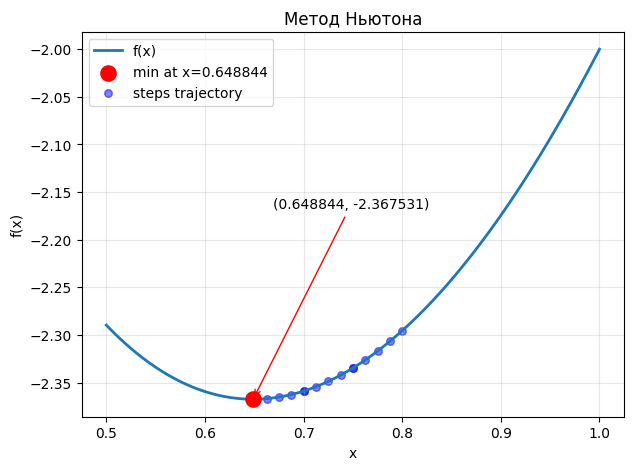

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def newton_method_table_smooth(f_prime, f_double_prime, x0=0.8, eps=1e-6, max_iter=100, max_step=0.05):
    x = x0
    iterations = 0
    steps_x = []
    steps_y = []
    table = []

    while iterations < max_iter:
        grad = f_prime(x)
        hess = f_double_prime(x)
        if abs(grad) < eps:
            break

        # классический шаг Ньютона
        delta = grad / hess

        # ограничиваем максимальный шаг для плавности
        if abs(delta) > max_step:
            delta = np.sign(delta) * max_step

        x_new = x - delta

        # Добавляем промежуточные точки для визуализации
        steps_x.extend(np.linspace(x, x_new, 5))
        steps_y.extend(F(np.linspace(x, x_new, 5)))

        # Сохраняем основной шаг в таблицу
        table.append([iterations+1, x, F(x), grad, hess])

        x = x_new
        iterations += 1

    # Финальный шаг
    steps_x.append(x)
    steps_y.append(F(x))
    table.append([iterations+1, x, F(x), f_prime(x), f_double_prime(x)])

    df = pd.DataFrame(table, columns=["Step", "x", "f(x)", "f'(x)", "f''(x)"])
    return x, steps_x, steps_y, df, iterations

xmin, steps_x, steps_y, df_steps, num_steps = newton_method_table_smooth(F_PRIME, F_DOUBLE_PRIME)

print("Minimum at x =", xmin)
print("f(xmin) =", F(xmin))
print("Number of steps:", num_steps)

print("\nFirst 10 steps:")
print(df_steps.head(10))

# График
xx = np.linspace(0.5, 1.0, 400)
yy = F(xx)

plt.figure(figsize=(7,5))
plt.plot(xx, yy, linewidth=2, label="f(x)")
plt.scatter([xmin], [F(xmin)], s=120, color="red", zorder=5,
            label=f"min at x={xmin:.6f}")
plt.annotate(f"({xmin:.6f}, {F(xmin):.6f})",
             xy=(xmin, F(xmin)),
             xytext=(xmin + 0.02, F(xmin) + 0.2),
             arrowprops=dict(arrowstyle="->", color="red"))

# Синие точки шагов (плавные)
plt.scatter(steps_x, steps_y, s=30, color="blue", alpha=0.5, label="steps trajectory")

plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Метод Ньютона")
plt.legend()
plt.show()


**Метод Пиявского / Ломаных (Условие Липшица)**

In [ ]:
# import matplotlib.pyplot as plt

# x_for_L = np.linspace(A, B, 1000)
# L = np.max(np.abs(F_PRIME(x_for_L)))
# print(f"Константа Липшица L = {L}")

# x = np.linspace(A, B, 1000)

# x_i = A 
# f_x_i = F(x_i)

# print(f"Начальная точка x_0 {x_i}, f(x_0) = {f_x_i}")

# p_values = f_x_i - L * np.abs(x - x_i)

# x_values = [x_i]
# f_values = [f_x_i]
# p_functions_vals = [p_values.copy()]

# for iteration in range(1000):
#     # ШАГ 3/5/7: Находим следующую точку как минимум текущей p_k(x)
#     next_x_idx = np.argmin(p_values)
#     next_x = x[next_x_idx]

#     # Проверяем, не посещали ли мы уже эту точку
#     if any(np.abs(np.array(x_values) - next_x) < EPS):
#         print(f"Точка {next_x} уже посещалась. Останавливаемся.")
#         break

#     # Вычисляем функцию в новой точке
#     f_next = F(next_x)

#     print(
#         f"Итерация {iteration+1}: x_{iteration+1} = {next_x:.4f}, f(x_{iteration+1}) = {f_next:.4f}"
#     )

#     # ШАГ 4/6: Составляем новую функцию p_{k+1}(x)
#     g_new = f_next - L * np.abs(x - next_x)
#     p_x = np.max_imum(p_x, g_new)  # p_{k+1}(x) = max(p_k(x), g(x, x_{k+1}))

#     # Сохраняем данные
#     x_values.append(next_x)
#     f_values.append(f_next)
#     p_functions_vals.append(p_x.copy())

#     # Критерий остановки (опционально)
#     current_best = min(f_values)
#     lower_bound = np.min(p_x)
#     gap = current_best - lower_bound

#     print(
#         f"  Текущий лучший: {current_best:.4f}, Нижняя граница: {lower_bound:.4f}, Разрыв: {gap:.4f}"
#     )

#     if gap < EPS:
#         print("Достигнута заданная точность!")
#         break

# best_idx = np.argmin(f_values)
# best_x = x_values[best_idx]
# best_f = f_values[best_idx]

# # Results
# print(f"\nРезультат:")
# print(f"Лучшая точка: x = {best_x:.4f}")
# print(f"Лучшее значение: f(x) = {best_f:.4f}")
# print(f"Всего вычислений функции: {len(x_values)}")

# # Plotting
# plt.figure(figsize=(12, 8))
# plt.plot(x, F(x), "b-", linewidth=3, label="f(x)")

# for i, p_func in enumerate(p_values):
#     alpha = 0.2 + 0.8 * (i / len(p_values))
#     plt.plot(
#         x, p_func, "r-", alpha=alpha, linewidth=1, label=f"p_{i}(x)" if i < 3 else ""
#     )

# plt.plot(x, p_x, "r-", linewidth=2, label="Финальная огибающая P(x)")
# plt.scatter(x_values, f_values, color="red", s=50, zorder=5, label="Точки измерений")
# plt.scatter(
#     [best_x],
#     [best_f],
#     color="green",
#     s=100,
#     zorder=10,
#     label=f"Лучшая точка: f({best_x:.3f}) = {best_f:.3f}",
# )

# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Метод ломаных")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()

Константа Липшица L = 2.0
Начальная точка x_0 0.5, f(x_0) = -2.289720770839918
Итерация 1: x_1 = 1.0000, f(x_1) = -2.0000


NameError: name 'p_x' is not defined